## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f(x) = 2x^2 -2x + 1$$
$$f(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x5$$
$$f(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f(x) = 3*x + sin(x) - cos^3(x)$$
$$f(x) = 27x^3−3x+1$$

### Zadanie 1:
Zaimplementuj metodą bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

### Metoda bisekcji:
#### Założenia:
<p>1) funckja f(x) ciągła na przedziale domkniętym [a;b] </p>
<p>2) funkcja przyjmuje różne znaki na końcach przedziału, czyli f(a)*f(b)<0 </p>

Przedział poszukiwań: (-2, 2)
Miejsce zerowe funkcji 2x^2-2x+1 : X


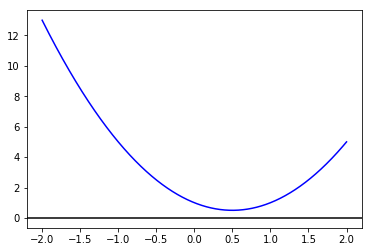

Przedział poszukiwań: (0, 1)
Miejsce zerowe funkcji x^5-8x^4+44x^3-91x^2+85x-26 : 0.5570249557495117


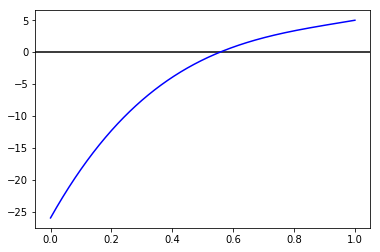

Przedział poszukiwań: (1.5, 2)
Miejsce zerowe funkcji 4^x-3^(2x)+2^(3x)-1 : 1.8928403854370117


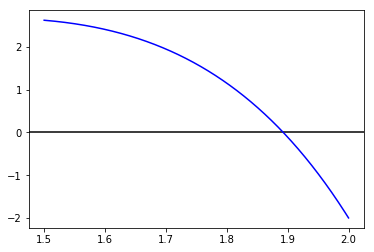

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 3x+sin(x)-cos^3(x) : 0.23109912872314453


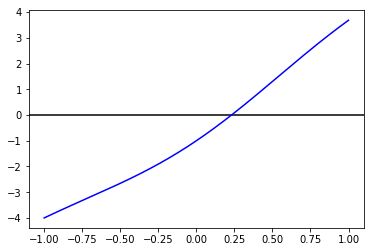

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 27x^3-3x+1 : -0.4415731430053711


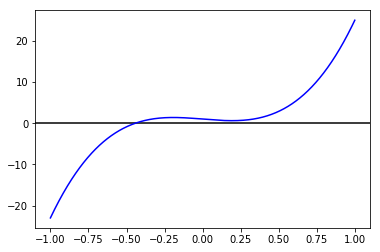

In [2]:
import numpy as np
import matplotlib.pyplot as plt

functions = [lambda x: 2*x**2 - 2*x +1, lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5, lambda x: 4**x - 3**(2*x) + 2**(3*x)-1, lambda x: 3*x + np.sin(x) - np.cos(x)**3, lambda x: 27*x**3 - 3*x +1]
functions_names = ["2x^2-2x+1", "x^5-8x^4+44x^3-91x^2+85x-26", "4^x-3^(2x)+2^(3x)-1", "3x+sin(x)-cos^3(x)","27x^3-3x+1"]

def bisection_method(f, a, b, eps):
    if f(a)*f(b) > 0:
        return "X"
    else:
        it = 0
        while abs(a-b) > eps:
            midpoint = (a + b)/2.0
            it+=1
            if abs(f(midpoint)) <= eps:
                return midpoint
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint 
        return midpoint
    
def show_graph(f, a, b):
    x = np.linspace(a, b, 1000)
    plt.axhline(color = 'k')
    plt.plot(x, f(x), color = 'b')
    plt.show()

def bisection_method_examples(functions):
    start = [-2, 0, 1.5, -1, -1]
    end = [2, 1, 2, 1, 1]
    for f in range(len(functions_names)):
        print("Przedział poszukiwań:", f"({start[f]}, {end[f]})")
        print("Miejsce zerowe funkcji", functions_names[f],":", bisection_method(functions[f], start[f], end[f], 0.000001))
        show_graph(functions[f], start[f], end[f])
        

bisection_method_examples(functions)

### Zadanie 2: 
Zaimplementuj metodą Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

### Metoda Newtona-Raphsona
#### Założenia:
<p>1) W przedziale domkniętym [a;b] znajduje się dokładnie jeden pierwiastek</p>
<p>2) Funkcja przyjmuje różne znaki na końcach przedziału, czyli f(a)*f(b)<0</p>
<p>3) Pierwsza i druga pochodna mają stały znak w tym przedziale</p>

Przedział poszukiwań: (-2, 2)
Miejsce zerowe funkcji 2x^2-2x+1 : X


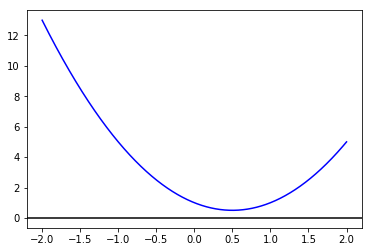

Przedział poszukiwań: (0, 1)
Miejsce zerowe funkcji x^5-8x^4+44x^3-91x^2+85x-26 : 0.5570255051379288


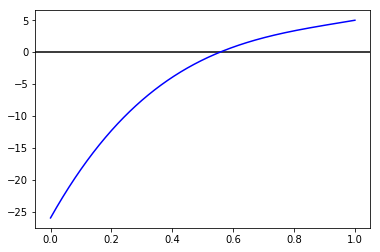

Przedział poszukiwań: (1.5, 2)
Miejsce zerowe funkcji 4^x-3^(2x)+2^(3x)-1 : 1.8928404708161677


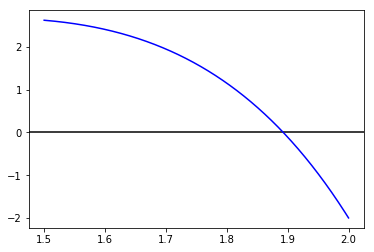

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 3x+sin(x)-cos^3(x) : 0.2310996034885791


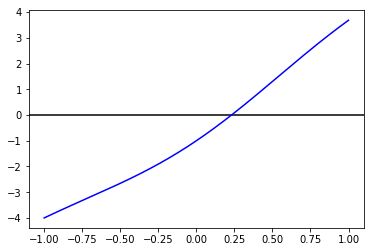

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 27x^3-3x+1 : -0.44157265242403326


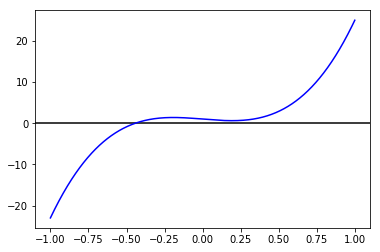

In [3]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from scipy.optimize import brentq

functions = [lambda x: 2*x**2 - 2*x +1, lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5, lambda x: 4**x - 3**(2*x) + 2**(3*x)-1, lambda x: 3*x + np.sin(x) - np.cos(x)**3, lambda x: 27*x**3 - 3*x +1]

def newton_raphson(f, a, b, eps):
    if f(a)*f(b)>0:
        return "X"
    x = a
    while abs(f(x))>eps or abs(f(x)/derivative(f,x,dx=1e-6))> eps:
        Dfx = derivative(f,x,dx=1e-6)
        fx = f(x)
        x = x - fx/Dfx
    return x

def newton_raphson_examples(functions):
    start = [-2, 0, 1.5, -1, -1]
    end = [2, 1, 2, 1, 1]
    for f in range(len(functions_names)):
        print("Przedział poszukiwań:", f"({start[f]}, {end[f]})")
        print("Miejsce zerowe funkcji", functions_names[f],":",newton_raphson(functions[f], start[f], end[f], 0.000001))
        show_graph(functions[f], start[f], end[f])
    
        
newton_raphson_examples(functions)

### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

### Metoda siecznych (Eulera)
#### Założenia:
<p>1) Funckja f(x) ciągła na przedziale domkniętym [a;b]</p>
<p>2) Funkcja przyjmuje różne znaki na końcach przedziału, czyli f(a)*f(b)<0 </p>
<p>3) Pierwsza pochodna funkcji jest rózna od 0 na przedziale [a;b]</p>

Przedział poszukiwań: (-2, 2)
Miejsce zerowe funkcji 2x^2-2x+1 : X


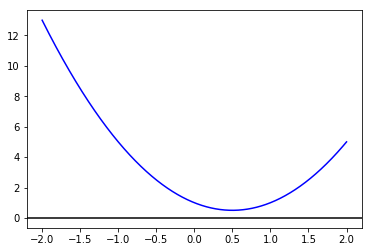

Przedział poszukiwań: (0, 1)
Miejsce zerowe funkcji x^5-8x^4+44x^3-91x^2+85x-26 : 0.5570257928969456


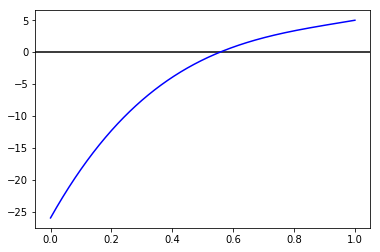

Przedział poszukiwań: (1.5, 2)
Miejsce zerowe funkcji 4^x-3^(2x)+2^(3x)-1 : 1.892840460182512


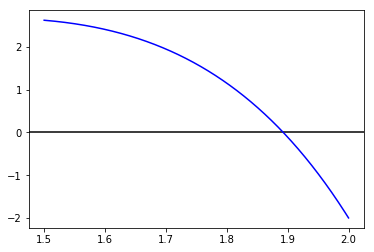

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 3x+sin(x)-cos^3(x) : 0.23109960306685198


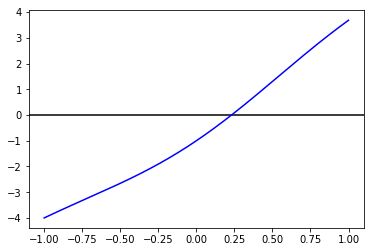

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 27x^3-3x+1 : -0.4415726510208768


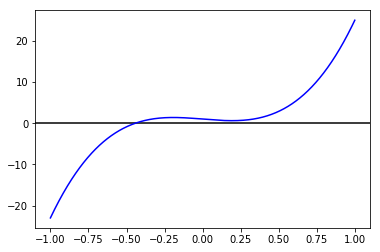

In [4]:
import numpy as np

functions = [lambda x: 2*x**2 - 2*x +1, lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5, lambda x: 4**x - 3**(2*x) + 2**(3*x)-1, lambda x: 3*x + np.sin(x) - np.cos(x)**3, lambda x: 27*x**3 - 3*x +1]
functions_names = ["2x^2-2x+1", "x^5-8x^4+44x^3-91x^2+85x-26", "4^x-3^(2x)+2^(3x)-1", "3x+sin(x)-cos^3(x)","27x^3-3x+1"]

def secant_method(f, a, b, eps): 
    n = 0; xm = 0; x0 = 0; c = 0;  
    if (f(a) * f(b) > 0): 
        return "X"
    while True:  
        x0 = ((a * f(b) - b * f(a)) / (f(b) - f(a)));  
        c = f(a) * f(x0);  
        a = b;  
        b = x0;   
        if (c == 0):  
            break; 
        xm = ((a * f(b) - b * f(a)) / (f(b) - f(a)));    
        if(abs(xm - x0) < eps): 
            break; 
    return x0

def secant_method_examples(functions):
    start = [-2, 0, 1.5, -1, -1]
    end = [2, 1, 2, 1, 1]
    for f in range(len(functions_names)):
        print("Przedział poszukiwań:", f"({start[f]}, {end[f]})")
        print("Miejsce zerowe funkcji", functions_names[f],":",secant_method(functions[f], start[f], end[f], 0.000001))
        show_graph(functions[f], start[f], end[f])
        
secant_method_examples(functions)

### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.

Przedział poszukiwań: (-2, 2)
Miejsce zerowe funkcji 2x^2-2x+1 : X


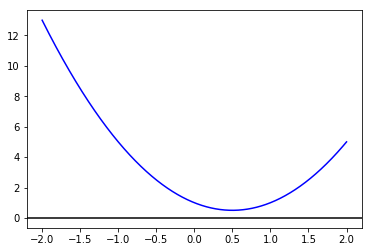

Przedział poszukiwań: (0, 1)
Miejsce zerowe funkcji x^5-8x^4+44x^3-91x^2+85x-26 : 0.557025516286526


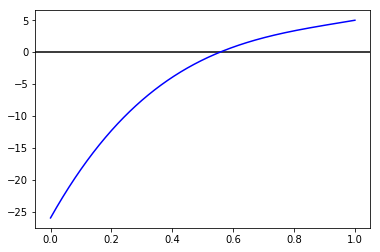

Przedział poszukiwań: (1.5, 2)
Miejsce zerowe funkcji 4^x-3^(2x)+2^(3x)-1 : 1.89284045811012


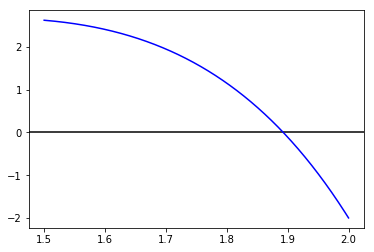

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 3x+sin(x)-cos^3(x) : 0.2310996034771355


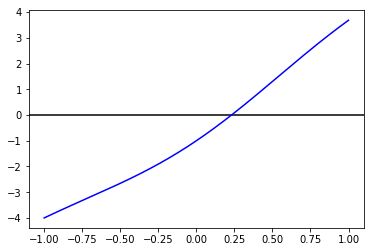

Przedział poszukiwań: (-1, 1)
Miejsce zerowe funkcji 27x^3-3x+1 : -0.4415726524147622


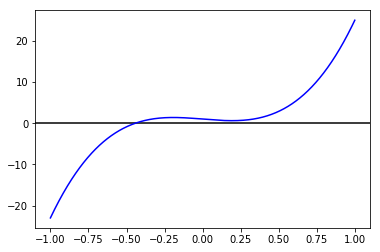

In [5]:
import numpy as np

functions = [lambda x: 2*x**2 - 2*x +1, lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5, lambda x: 4**x - 3**(2*x) + 2**(3*x)-1, lambda x: 3*x + np.sin(x) - np.cos(x)**3, lambda x: 27*x**3 - 3*x +1]

def with_scipy(f, a, b):
    if f(a)*f(b)>0:
        return "X"
    root, info = brentq(f, a, b, full_output=True)
    return root

def with_scipy_examples(functions):
    start = [-2, 0, 1.5, -1, -1]
    end = [2, 1, 2, 1, 1]
    for f in range(len(functions_names)):
        print("Przedział poszukiwań:", f"({start[f]}, {end[f]})")
        print("Miejsce zerowe funkcji", functions_names[f],":",with_scipy(functions[f], start[f], end[f]))
        show_graph(functions[f], start[f], end[f])
        
        
with_scipy_examples(functions)

In [6]:
def visualize(f, a, b):
    x = np.linspace(a, b, 1000)
    plt.axhline(color = 'k')
    plt.plot(x, f(x), color = 'b')
    if f(a)*f(b)<0:
        root, info = brentq(f, a, b, full_output=True)
        plt.axvline(x=root, color = 'r', **{'linestyle': 'dashed'})
    plt.show()


Funkcja: 2x^2-2x+1 przedział: (-2, 2) dokładność: 1e-07


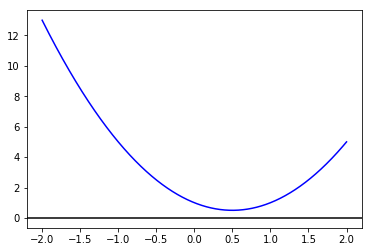

Method                   Result
-----------------------  --------
bisection method         X
Newton - Raphson method  X
secant_method            X
Scipy function brentq    X 


Funkcja: x^5-8x^4+44x^3-91x^2+85x-26 przedział: (0, 1) dokładność: 1e-07


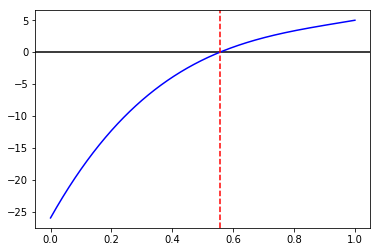

Method                     Result
-----------------------  --------
bisection method         0.557025
Newton - Raphson method  0.557026
secant_method            0.557026
Scipy function brentq    0.557026 


Funkcja: 4^x-3^(2x)+2^(3x)-1 przedział: (1.5, 2) dokładność: 1e-07


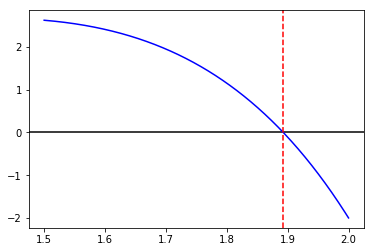

Method                     Result
-----------------------  --------
bisection method          1.89284
Newton - Raphson method   1.89284
secant_method             1.89284
Scipy function brentq     1.89284 


Funkcja: 3x+sin(x)-cos^3(x) przedział: (-1, 1) dokładność: 1e-07


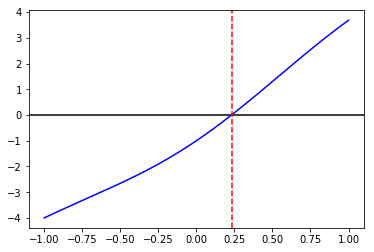

Method                     Result
-----------------------  --------
bisection method           0.2311
Newton - Raphson method    0.2311
secant_method              0.2311
Scipy function brentq      0.2311 


Funkcja: 27x^3-3x+1 przedział: (-1, 1) dokładność: 1e-07


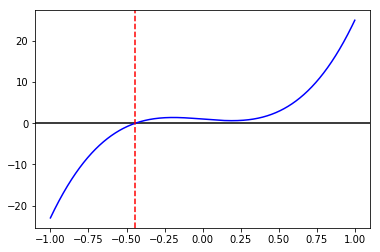

Method                      Result
-----------------------  ---------
bisection method         -0.441573
Newton - Raphson method  -0.441573
secant_method            -0.441573
Scipy function brentq    -0.441573 




In [7]:
from tabulate import tabulate

functions = [lambda x: 2*x**2 - 2*x +1, lambda x: -26 + 85*x - 91*x**2 + 44*x**3 - 8*x**4 + x**5, lambda x: 4**x - 3**(2*x) + 2**(3*x)-1, lambda x: 3*x + np.sin(x) - np.cos(x)**3, lambda x: 27*x**3 - 3*x +1]
functions_names = ["2x^2-2x+1", "x^5-8x^4+44x^3-91x^2+85x-26", "4^x-3^(2x)+2^(3x)-1", "3x+sin(x)-cos^3(x)","27x^3-3x+1"]

def compare_results(functions, functions_names):
    start = [-2, 0, 1.5, -1, -1]
    end = [2, 1, 2, 1, 1]
    eps =  0.0000001
    for f in range(len(functions)): 
        table = [["bisection method", bisection_method(functions[f], start[f], end[f], eps)],
                ["Newton - Raphson method", newton_raphson(functions[f], start[f], end[f], eps)],
                ["secant_method", secant_method(functions[f], start[f], end[f], eps)],
                ["Scipy function brentq", with_scipy(functions[f], start[f], end[f])]]
        headers = ["Method", "Result"]
        print("Funkcja:", functions_names[f],"przedział:", f"({start[f]}, {end[f]})", "dokładność:", eps)
        visualize(functions[f], start[f], end[f])
        print(tabulate(table, headers, tablefmt="simple"), "\n\n")
        
compare_results(functions, functions_names)